# Introduction: Global Health Spending

Data Source: https://www.kaggle.com/datasets/danevans/world-bank-wdi-212-health-systems

In this analysis, I explore the spending by countries around the world in terms of health systems and national health expenditure (the main data set used for this analysis is from 2016). I also scrutinise a number of relationships as portrayed by the data: for example between the spending as a percentage of a country's GDP and the number of Physicians in a country per 1000 persons. We also look more closely at data from the top 10 countries who spend the most per capita and per percentage of overall GDP on health costs. To conclude, we add an API to continue the analysis at another time! 


In [1]:
import pandas as pd
import os
working_directory = os.getcwd()
print(working_directory)

/Users/amielajoie


In [2]:
path = working_directory + '/downloads/2.12_Health_systems.csv'
df = pd.read_csv(path)

df.head(5)

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Replacing NaN values to 0, Dropping duplicates
df_clean = df.fillna(0)
df.drop_duplicates(inplace = True)

In [ ]:
#Dropping columns
del df_clean['Province_State']

In [20]:
 df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_Region                        210 non-null    object 
 1   World_Bank_Name                       210 non-null    object 
 2   Health_exp_pct_GDP_2016               210 non-null    float64
 3   Health_exp_public_pct_2016            210 non-null    float64
 4   Health_exp_out_of_pocket_pct_2016     210 non-null    float64
 5   Health_exp_per_capita_USD_2016        210 non-null    float64
 6   per_capita_exp_PPP_2016               210 non-null    float64
 7   External_health_exp_pct_2016          210 non-null    float64
 8   Physicians_per_1000_2009-18           210 non-null    float64
 9   Nurse_midwife_per_1000_2009-18        210 non-null    float64
 10  Specialist_surgical_per_1000_2008-18  210 non-null    float64
 11  Completeness_of_bir

In [27]:
#Sorting Health spending out of pocket (high to low)

df_clean.sort_values(by = ['Health_exp_out_of_pocket_pct_2016'], ascending = False )

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
207,0,"Yemen, Rep.",5.6,10.2,81.0,72.0,144.5,7.8,0.3,0.7,0.8,30.7,0.0
7,Armenia,Armenia,9.9,16.5,80.6,358.8,876.9,1.7,2.9,5.6,86.7,99.3,76.0
10,Azerbaijan,Azerbaijan,6.9,20.0,78.9,268.2,1193.1,0.4,3.4,7.0,67.6,0.0,0.0
87,Iraq,Iraq,3.3,21.1,78.5,152.6,493.7,0.4,0.8,1.7,7.6,99.0,65.0
0,Afghanistan,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Libya,Libya,0.0,0.0,0.0,0.0,0.0,0.0,2.2,6.7,0.0,0.0,0.0
176,France,St. Martin (French part),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,Denmark,Greenland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,US,Guam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Which 10 countries spent the most per capita (in USD) on health?

df_clean.nlargest(10, 'Health_exp_per_capita_USD_2016')

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
199,US,United States,17.1,81.8,11.1,9869.7,9869.7,0.0,2.6,8.6,54.7,100.0,98.0
181,Switzerland,Switzerland,12.2,62.8,29.6,9836.0,7867.4,0.0,4.2,17.3,94.8,100.0,100.0
140,Norway,Norway,10.5,85.1,14.5,7477.9,6203.5,0.0,4.6,18.1,67.2,100.0,100.0
111,Luxembourg,Luxembourg,6.2,81.2,11.2,6271.4,6374.2,1.2,3.0,12.3,80.8,100.0,100.0
180,Sweden,Sweden,10.9,83.5,15.2,5710.6,5386.7,0.0,5.4,11.5,113.1,100.0,100.0
50,Denmark,Denmark,10.4,84.1,13.7,5565.6,5093.0,0.0,4.5,10.3,69.0,100.0,98.0
83,Iceland,Iceland,8.3,81.5,16.9,5063.6,4245.1,0.0,4.0,15.7,101.6,100.0,100.0
8,Australia,Australia,9.3,68.3,18.9,5002.4,4529.9,0.0,3.6,12.7,45.1,100.0,100.0
88,Ireland,Ireland,7.4,72.1,13.0,4758.6,5299.7,0.0,3.1,14.3,72.0,100.0,100.0
132,Netherlands,Netherlands,10.4,81.0,11.5,4742.0,5251.2,0.0,3.5,11.1,49.0,100.0,100.0


In [36]:
#Looking only at data from Ireland

df_clean.loc[88]

Country_Region                          Ireland
World_Bank_Name                         Ireland
Health_exp_pct_GDP_2016                     7.4
Health_exp_public_pct_2016                 72.1
Health_exp_out_of_pocket_pct_2016          13.0
Health_exp_per_capita_USD_2016           4758.6
per_capita_exp_PPP_2016                  5299.7
External_health_exp_pct_2016                0.0
Physicians_per_1000_2009-18                 3.1
Nurse_midwife_per_1000_2009-18             14.3
Specialist_surgical_per_1000_2008-18       72.0
Completeness_of_birth_reg_2009-18         100.0
Completeness_of_death_reg_2008-16         100.0
Name: 88, dtype: object

In [22]:
#Using NumPy to find the median & mean of global health spending per capita (no statistical difference)

gdp = df_clean['Health_exp_pct_GDP_2016']
np.gdp = np.array(gdp)
gdp_mean = np.mean(np.gdp)
gdp_median = np.median(np.gdp)

print(gdp_mean)
print(gdp_median)

5.947619047619048
5.95


In [25]:
#Finding countries with above mean/median spending of GDP on health 

above_avg_gdp = df_clean[(df_clean['Health_exp_pct_GDP_2016']>= 5.95)]

#Finding countries with above mean/median spending of GDP on health and with 5 or more Physicians per 1000 person

high_gdp_physicans = df_clean[(df_clean['Health_exp_pct_GDP_2016']>= 5.95) & (df_clean['Physicians_per_1000_2009-18'] >= 5)]

In [24]:
#Looping a list: Countries with above average % of GDP spending & with more than 5 physicians per 1000 people

physicans = [['Austria', 5.1], ['Cuba', 8.2], ['Georgia', 5.1], ['San Marino', 6.1], ['Sweden', 5.4], ['Uruguay', 5.0]]
for x, y in physicans : 
    print('number of physicans in ' + x + 'is ' + str(y) + ' per 1000 people')

number of physicans in Austriais 5.1 per 1000 people
number of physicans in Cubais 8.2 per 1000 people
number of physicans in Georgiais 5.1 per 1000 people
number of physicans in San Marinois 6.1 per 1000 people
number of physicans in Swedenis 5.4 per 1000 people
number of physicans in Uruguayis 5.0 per 1000 people


Text(0.5, 1.0, 'Relationship between Health Spending as % of GDP and the Number of Physicians')

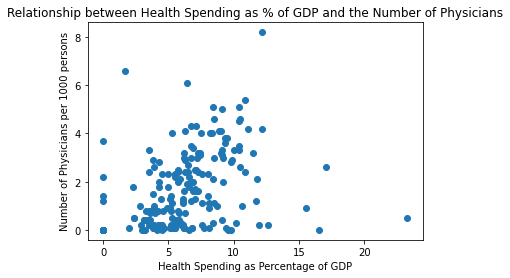

In [40]:
#Relationship between spending as % of a country's GDP, and the number of physicians per 1000 people?

plt.scatter(df_clean['Health_exp_pct_GDP_2016'], df_clean['Physicians_per_1000_2009-18'])
plt.xlabel('Health Spending as Percentage of GDP')
plt.ylabel('Number of Physicians per 1000 persons')
plt.title('Relationship between Health Spending as % of GDP and the Number of Physicians')

Text(0, 0.5, 'Nurse_Midwives_per 1000 people')

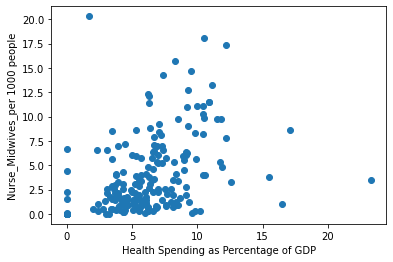

In [129]:
#Relationship between spending as % of a country's GDP, and the number of nurses per 1000 people?

plt.scatter(df_clean['Health_exp_pct_GDP_2016'], df_clean['Nurse_midwife_per_1000_2009-18'])
plt.xlabel('Health Spending as Percentage of GDP')
plt.ylabel('Nurse_Midwives_per 1000 people')


In [73]:
#Creating DataFrame by Index for Top 10

top10 = {'Label': [ '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
         'Country': [ 'United States', 'Switzerland', 'Norway', 'Luxembourg', 'Sweden', 'Denmark', 'Iceland', 'Australia', 'Ireland', 'The Netherlands'],
         '2016 Health spending % gdp': [17.1, 12.2, 10.5, 6.2, 10.9, 10.4, 8.3, 9.3, 7.4, 10.4],
         '2016 Health spending per capita': [9869.7, 9836.0, 7477.9, 6271.4, 5710.6, 5565.6, 5063.6, 5002.4, 4758.6, 4742.0]}

top10_df = pd.DataFrame(top10).set_index('Label')
top10_df

,Country,2016 Health spending % gdp,2016 Health spending per capita
Label,,,
1,United States,17.1,9869.7
2,Switzerland,12.2,9836.0
3,Norway,10.5,7477.9
4,Luxembourg,6.2,6271.4
5,Sweden,10.9,5710.6
6,Denmark,10.4,5565.6
7,Iceland,8.3,5063.6
8,Australia,9.3,5002.4
9,Ireland,7.4,4758.6


<function matplotlib.pyplot.show(close=None, block=None)>

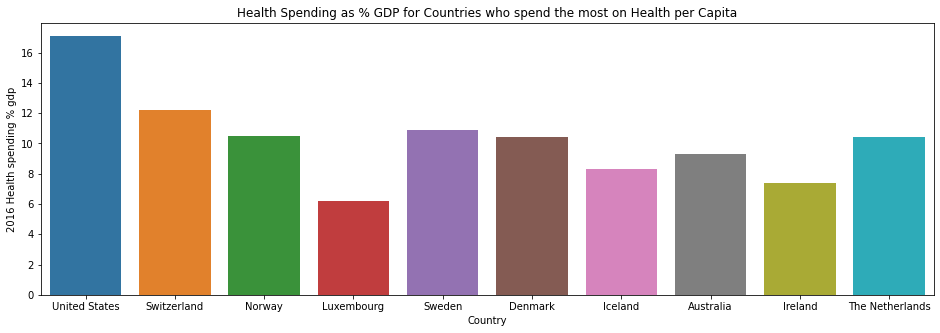

In [78]:
plt.figure(figsize = (16, 5))
sns.barplot(x = top10_df['Country'], y = top10_df['2016 Health spending % gdp'])
plt.title('Health Spending as % GDP for Countries who spend the most on Health per Capita')

plt.show


In [130]:
#New DataFrame: Adding 2019 figures for GDP spending on healthcare

r = requests.get('https://www.statista.com/statistics/268826/health-expenditure-as-gdp-percentage-in-oecd-countries/')
type(r)

newtop10 = {'Label': [ '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
        'Country': [ 'United States', 'Switzerland', 'Norway', 'Luxembourg', 'Sweden', 'Denmark', 'Iceland', 'Australia', 'Ireland', 'The Netherlands'],
        '2019 Health spending % gdp': [ 16.8, 11.3, 10.5, 6.2, 10.9, 10, 8.6, 9.4, 6.7, 10.2]}

newtop10_df = pd.DataFrame(newtop10).set_index('Label')
print(newtop10_df)

               Country  2019 Health spending % gdp
Label                                             
1        United States                        16.8
2          Switzerland                        11.3
3               Norway                        10.5
4           Luxembourg                         6.2
5               Sweden                        10.9
6              Denmark                        10.0
7              Iceland                         8.6
8            Australia                         9.4
9              Ireland                         6.7
10     The Netherlands                        10.2


In [86]:
#Merging Dataframes for Top10 and NewTop10

inner_merge = pd.merge(left = newtop10_df, right = top10_df, left_on = ['Country', 'Label'], right_on = ['Country', 'Label'])
print(inner_merge)


               Country  2019 Health spending % gdp  \
Label                                                
1        United States                        16.8   
2          Switzerland                        11.3   
3               Norway                        10.5   
4           Luxembourg                         6.2   
5               Sweden                        10.9   
6              Denmark                        10.0   
7              Iceland                         8.6   
8            Australia                         9.4   
9              Ireland                         6.7   
10     The Netherlands                        10.2   

       2016 Health spending % gdp  2016 Health spending per capita  
Label                                                               
1                            17.1                           9869.7  
2                            12.2                           9836.0  
3                            10.5                           7477.9  
4     

Text(0.5, 1.0, 'Health Spending as % of GDP (2016 - 2019)')

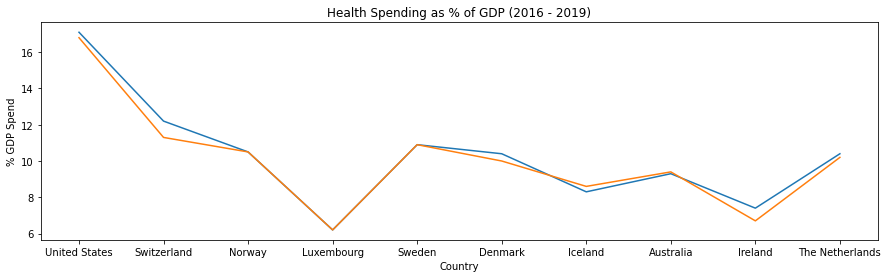

In [116]:
plt.subplots(figsize=(15,4))

plt.plot(inner_merge['Country'],inner_merge['2016 Health spending % gdp'])
plt.plot(inner_merge['Country'],inner_merge['2019 Health spending % gdp'])

plt.xlabel('Country')
plt.ylabel('% GDP Spend')
plt.title('Health Spending as % of GDP (2016 - 2019)')

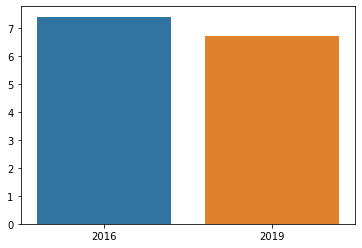

In [125]:
#Looking at Ireland specifically

year = [2016, 2019]
GDP_spend = [7.4, 6.7]
sns.barplot (x = year, y = GDP_spend)
plt.title = 'Ireland % GDP Spend on Health (2016-2019)'
plt.show()


In [97]:
#Final API import for analysis: Covid-19 cases... to be continued!

import requests
covid19 = requests.get('https://api.covid19api.com/summary')
covid19 = covid19.json()
pd.DataFrame(covid19['Countries'])
covid19cases = pd.DataFrame(covid19['Countries'])

In [108]:
covid19cases.describe()
covid19cases.info()
covid19cases.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              194 non-null    object
 1   Country         194 non-null    object
 2   CountryCode     194 non-null    object
 3   Slug            194 non-null    object
 4   NewConfirmed    194 non-null    int64 
 5   TotalConfirmed  194 non-null    int64 
 6   NewDeaths       194 non-null    int64 
 7   TotalDeaths     194 non-null    int64 
 8   NewRecovered    194 non-null    int64 
 9   TotalRecovered  194 non-null    int64 
 10  Date            194 non-null    object
 11  Premium         194 non-null    object
dtypes: int64(6), object(6)
memory usage: 18.3+ KB


,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,212e2c0f-f1d7-419b-b01a-e34057f88530,Afghanistan,AF,afghanistan,66,177321,1,7657,0,0,2022-03-24T09:55:29.07Z,{}
1,b3295716-bd88-4677-9062-82b876226f56,Albania,AL,albania,18,273164,0,3489,0,0,2022-03-24T09:55:29.07Z,{}
2,05702899-1d0d-426e-a387-9e57b1aa9e71,Algeria,DZ,algeria,12,265585,0,6873,0,0,2022-03-24T09:55:29.07Z,{}
3,daa0609d-30ae-4e7a-923d-5b3bfafd8bf1,Andorra,AD,andorra,479,39713,0,153,0,0,2022-03-24T09:55:29.07Z,{}
4,929423dd-5056-4a5a-9606-2932454a6175,Angola,AO,angola,0,99058,0,1900,0,0,2022-03-24T09:55:29.07Z,{}
